### Q : Whether the client has subscribed a term deposit or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import confusion_matrix

In [35]:
df = pd.read_csv('bank-full (1).csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


In [42]:
df.shape

(45211, 17)

In [43]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [44]:
df[df.duplicated()].shape

(0, 17)

In [45]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.096526,-0.008843,-0.006622,0.005966,-0.025323,-0.000467
balance,0.096526,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.008843,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.006622,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.005966,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.025323,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,-0.000467,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [46]:
from sklearn.preprocessing import LabelEncoder
df['default']=LabelEncoder().fit_transform(df['default'])
df['housing']=LabelEncoder().fit_transform(df['housing'])
df['loan']=LabelEncoder().fit_transform(df['loan'])
df['y']=LabelEncoder().fit_transform(df['y'])
df['job']=LabelEncoder().fit_transform(df['job'])
df['marital']=LabelEncoder().fit_transform(df['marital'])
df['education']=LabelEncoder().fit_transform(df['education'])
df['month']=LabelEncoder().fit_transform(df['month'])

df=df.drop(['contact','month','poutcome'],axis=1)
df.head()#checking the datasets

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58.0,4,1,2,0,2143,1,0,5,261,1,-1,0,0
1,44.0,9,2,1,0,29,1,0,5,151,1,-1,0,0
2,33.0,2,1,1,0,2,1,1,5,76,1,-1,0,0
3,47.0,1,1,3,0,1506,1,0,5,92,1,-1,0,0
4,33.0,11,2,3,0,1,0,0,5,198,1,-1,0,0


In [47]:
df.y.unique()

array([0, 1])

In [48]:
df.dtypes

age          float64
job            int32
marital        int32
education      int32
default        int32
balance        int64
housing        int32
loan           int32
day            int64
duration       int64
campaign       int64
pdays          int64
previous       int64
y              int32
dtype: object

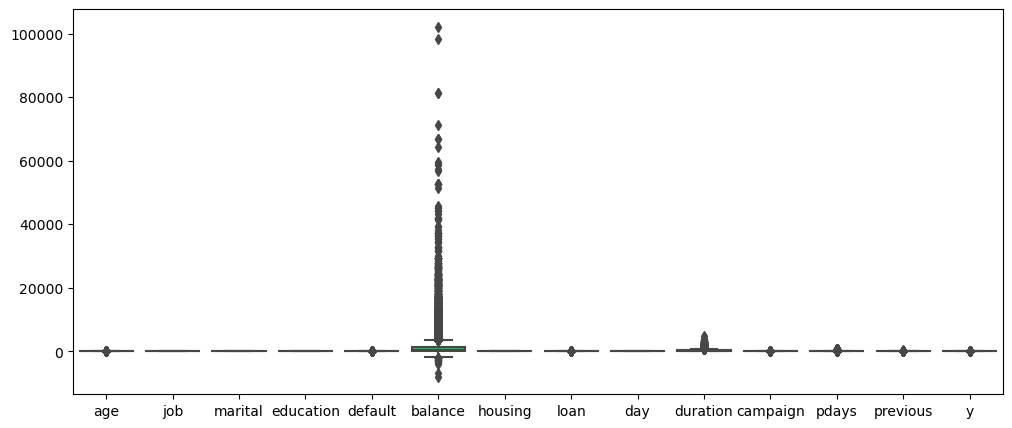

In [11]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df);

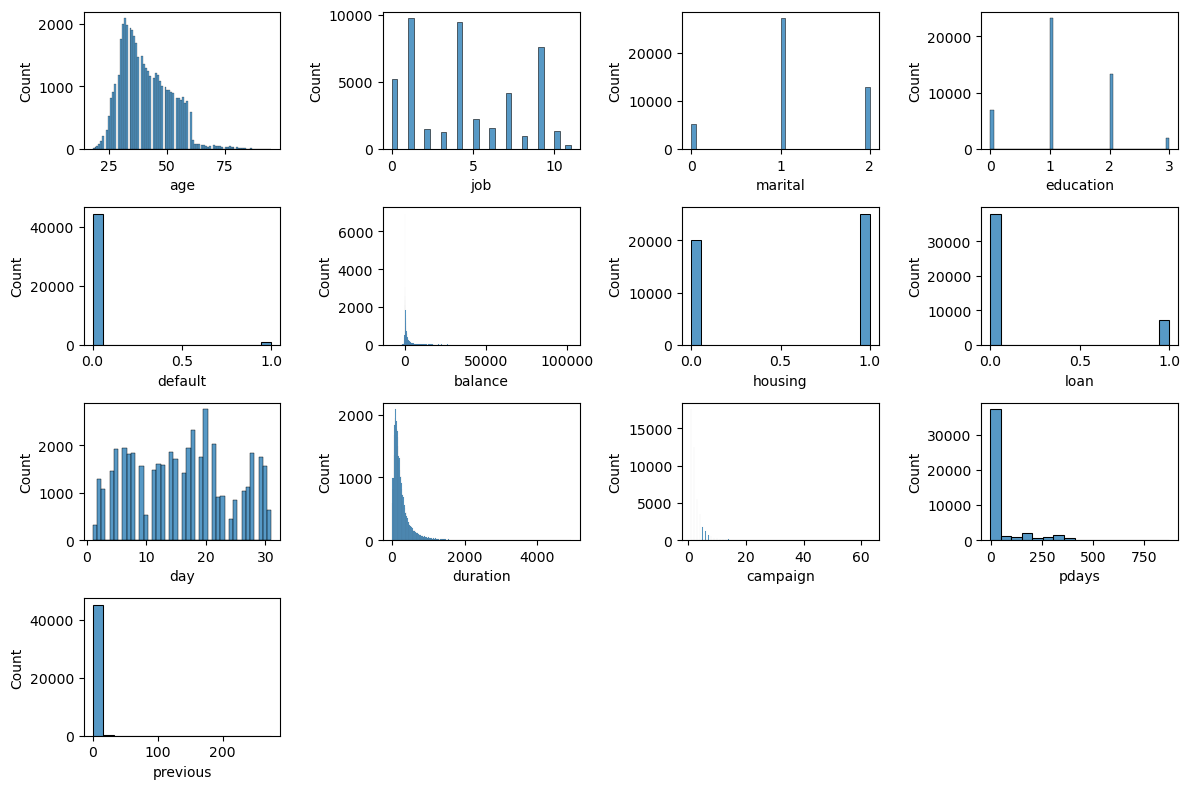

In [20]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
c=4
r=4
col=x.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(12,8))
for i,co in enumerate(col):
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=x[co],ax=axis)
size.tight_layout()
plt.show()

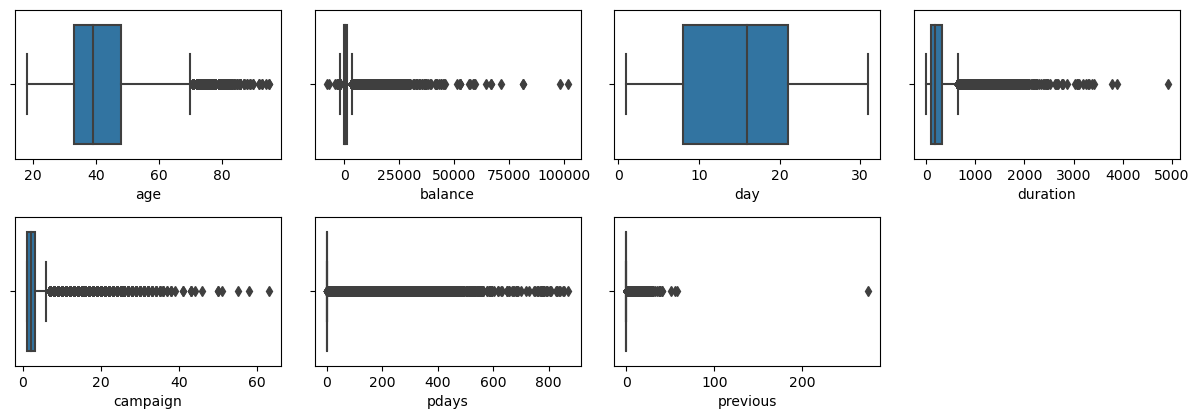

In [37]:
import matplotlib.pyplot as plt
c=4
r=4
col=x.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(12,8))
for i,co in enumerate(col):
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=x[co],ax=axis)
size.tight_layout()
plt.show()

In [49]:
def treatoutlier(df,cols):
    for col in cols:
        
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
    
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
    
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))

In [50]:
#importing the Standard scaler to scale the data 
from sklearn.preprocessing import StandardScaler

x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [51]:
treatoutlier(df,x.columns)

<AxesSubplot:>

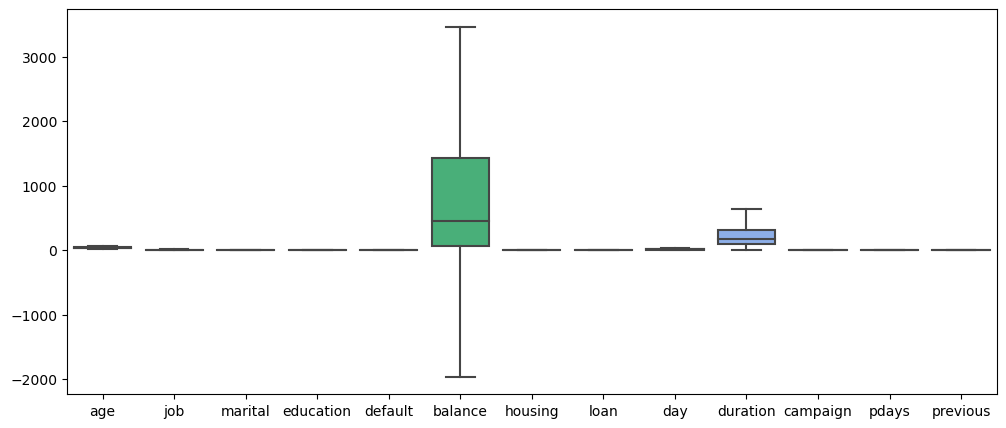

In [54]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df.iloc[:,:-1])

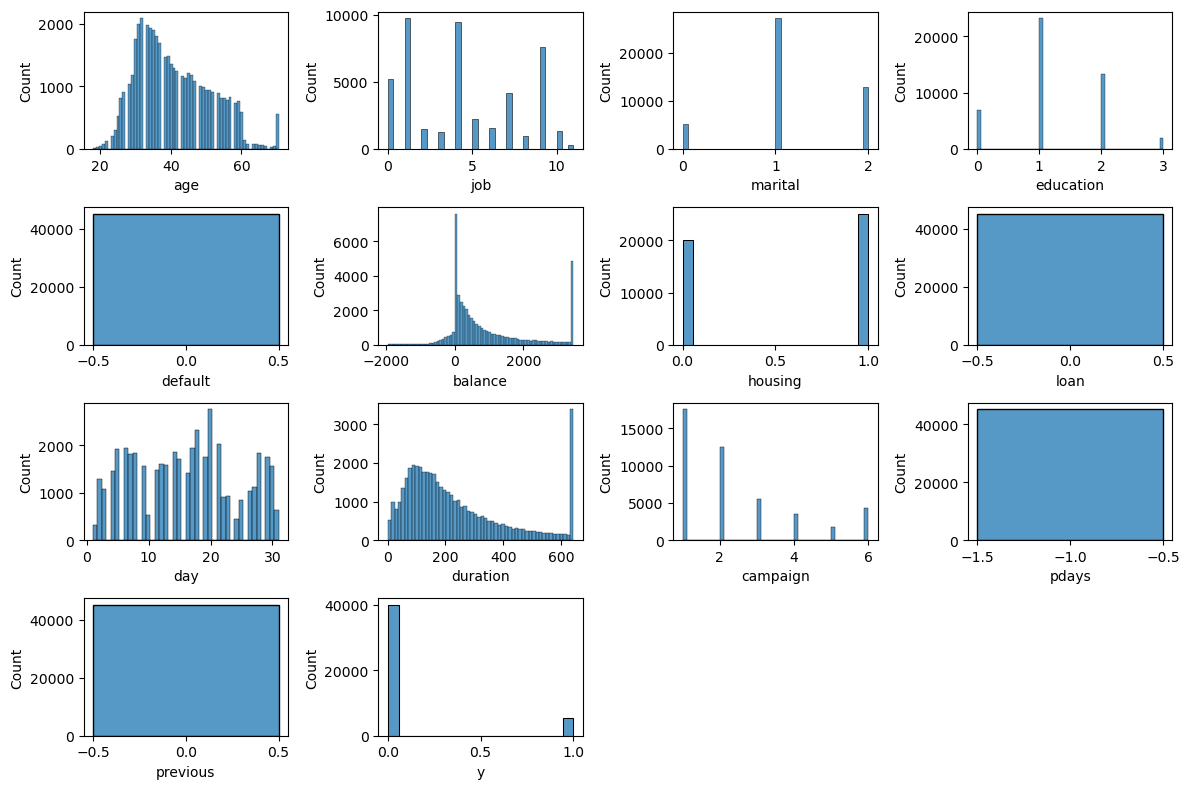

In [19]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
c=4
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(12,8))
for i,co in enumerate(col):
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=df[co],ax=axis)
size.tight_layout()
plt.show()

## model building

In [21]:
# fit the model by logistic regression
x=StandardScaler().fit_transform(x)
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [22]:
classifier.intercept_

array([-2.58736829])

In [23]:
classifier.coef_

array([[ 0.05344756,  0.04349724,  0.13551277,  0.16460159, -0.04656264,
         0.05981184, -0.57647713, -0.24257349, -0.02198947,  1.00246432,
        -0.41531772,  0.29412545,  0.18781883]])

### moddel prediction

In [25]:
#predict for x dataset
y_predict = classifier.predict(x)
y_predict

array([0, 0, 0, ..., 1, 0, 0])

In [26]:
y_pred_df = pd.DataFrame({'actual': y,
                         'predictions': y_predict})
y_pred_df

,actual,predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


## Testing the accuracy of model

In [27]:
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_predict)
print(confusion_matrix)

[[39175   747]
 [ 4208  1081]]


In [28]:
#accuracy
accuracy = ac(y,y_predict)
accuracy

0.8904027780849794

In [29]:
# or
((39175+1081)/(39175+747+4208+1081))*100

89.04027780849793

In [31]:
# classification report 
from sklearn.metrics import classification_report
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.59      0.20      0.30      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.59      0.62     45211
weighted avg       0.87      0.89      0.87     45211



### ROC Curve

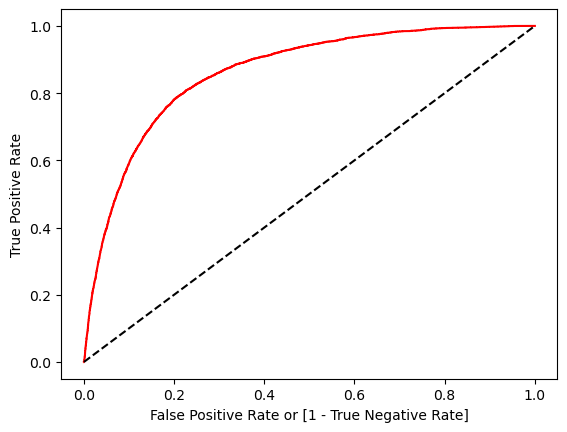

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])

auc = roc_auc_score(y, y_predict)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area = %0.2f)'%auc)
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()